In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import xml.etree.ElementTree as ET
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import json

In [ ]:
def create_dataset(annotations_path, json_path, images_path):
    dataset = {
        "file": [],
        "name": [],
        "xmin": [],
        "ymin": [],
        "xmax": [],
        "ymax": [],
    }

    for json_file in glob.glob(annotations_path + json_path + "/*.json"):
        # JSON 파일 읽기
        with open(json_file, 'r', encoding='euc-kr') as f:
            json_data = json.load(f)

        for entry in json_data:
            filename = entry["filename"]
            face_exp_uploader = entry.get("faceExp_uploader")
            image_file = os.path.join(images_path, filename)

            if not os.path.exists(image_file):
                print(f"Image file not found: {filename}")
                continue  # 이미지 파일이 없으면 해당 항목 건너뛰기

            if face_exp_uploader:
                boxes = entry.get("annot_A", {}).get("boxes")
                if boxes:
                    dataset["file"].append(filename)
                    dataset["name"].append(face_exp_uploader)
                    dataset["xmin"].append(boxes.get("minX"))
                    dataset["ymin"].append(boxes.get("minY"))
                    dataset["xmax"].append(boxes.get("maxX"))
                    dataset["ymax"].append(boxes.get("maxY"))
                else:
                    print(f"No boxes found for {filename}")

    return dataset

In [ ]:
annotations_path = "/content/drive/MyDrive/감정따뜻쟁이/label/"
train_images_path = "/content/drive/MyDrive/yolo_output/train/images/"
test_images_path = "/content/drive/MyDrive/yolo_output/test/images/"
val_images_path = "/content/drive/MyDrive/yolo_output/val/images/"

dataset1 = create_dataset(annotations_path, "train", train_images_path)
dataset2 = create_dataset(annotations_path, "test", test_images_path)
dataset3 = create_dataset(annotations_path, "val", val_images_path)


Image file not found: 7zwecfe6e57f975ee8b238b355e3e87923c4557383daae96720c1b8c3f669g9m2.jpg
Image file not found: oxmt62fbb28fafcdaa8d64e75a332e1d506d6a079cb45fc9e00c576c40fbeo0wy.jpg
Image file not found: s1mu862ea97f26b2720eeecb51156f6e32e8523fd62f3f04ef2f727639f52d7g3.jpg
Image file not found: twdva8d723865fa1005873a6967797c75f3dd83197f13f7daa3e3926947071al6.jpg
Image file not found: 5yid6d7ae32bf14b1343da46cfdb3fdffc8e1c64baf4fb1b175690f648a870v69.jpg
Image file not found: bpv531e5cebdb1c00085158bb0677c5596ccabf1c8a5cb0007991571bf306wcd4.jpg
Image file not found: s1q397a38900c1e1f950496109900e7c01f0630459790d8590010655c4090vlh0.jpg
Image file not found: 7m2k46c05803855399ea1ee1911875ee59e05640c93135c0bc91b5660456cdo8k.jpg
Image file not found: n55yc741f09701506c7eb5ba30533db35c905ab5bf0597b5652ece03c5950ozv1.jpg
Image file not found: bid7b3c93409e1d83514689337f6d3d63a338339d71c9ce7fded153d3576fk2ml.jpg
Image file not found: if0lfc4b517c6597e3656dbea350e406e1b5ae4e175e46059706487590

In [ ]:
def create_dataset2(annotations_path2, json_path, images_path2):
    dataset = {
        "file": [],
        "name": [],
        "xmin": [],
        "ymin": [],
        "xmax": [],
        "ymax": [],
    }

    for json_file in glob.glob(annotations_path2 + json_path + "/*.json"):
        # JSON 파일 읽기
        with open(json_file, 'r') as f:
            json_data = json.load(f)

        for entry in json_data:
            filename = entry["filename"]
            face_exp_uploader = entry.get("faceExp_uploader")
            image_file = os.path.join(images_path2, filename)

            if not os.path.exists(image_file):
                print(f"Image file not found: {filename}")
                continue  # 이미지 파일이 없으면 해당 항목 건너뛰기

            if face_exp_uploader:
                boxes = entry.get("annot_A", {}).get("boxes")
                if boxes:
                    dataset["file"].append(filename)
                    dataset["name"].append(face_exp_uploader)
                    dataset["xmin"].append(boxes.get("minX"))
                    dataset["ymin"].append(boxes.get("minY"))
                    dataset["xmax"].append(boxes.get("maxX"))
                    dataset["ymax"].append(boxes.get("maxY"))
                else:
                    print(f"No boxes found for {filename}")

    return dataset

In [ ]:
annotations_path2 = "/content/drive/MyDrive/label_2/"
train_images_path2 = "/content/drive/MyDrive/yolo_output/train/images/"
test_images_path2 = "/content/drive/MyDrive/yolo_output/test/images/"
val_images_path2 = "/content/drive/MyDrive/yolo_output/val/images/"

dataset4 = create_dataset2(annotations_path2, "train", train_images_path2)
dataset5 = create_dataset2(annotations_path2, "test", test_images_path2)
dataset6 = create_dataset2(annotations_path2, "val", val_images_path2)

In [ ]:
df1 = pd.DataFrame(dataset1)
df2 = pd.DataFrame(dataset2)
df3 = pd.DataFrame(dataset3)
df4 = pd.DataFrame(dataset4)
df5 = pd.DataFrame(dataset5)
df6 = pd.DataFrame(dataset6)

In [ ]:
df1.head()

,file,name,xmin,ymin,xmax,ymax
0,sfpsd1254c044a197b3440b24c44b0cbe0b294f90ac879...,기쁨,1504.474500,642.640800,2243.173300,1596.718300
1,2tby14ba67fea06c15c1c19c15c47b0a7c90bbe3f06076...,기쁨,1316.008500,515.588943,2075.192400,1604.840914
2,0jsg06048a28fde3caad404f93dec397e5c579e83c1c2c...,기쁨,1563.979100,630.578000,2147.691000,1409.854700
3,kcj92df0c0404d268c1a2bb901ac34326fd734416b4204...,기쁨,990.366600,724.068700,1799.860800,1808.655200
4,zlye07fb710879977db578f793838be19b15b80543e98b...,기쁨,1129.214047,456.744658,1995.204053,1707.601262


In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index = True)

In [ ]:
df.head()

,file,name,xmin,ymin,xmax,ymax
0,sfpsd1254c044a197b3440b24c44b0cbe0b294f90ac879...,기쁨,1504.474500,642.640800,2243.173300,1596.718300
1,2tby14ba67fea06c15c1c19c15c47b0a7c90bbe3f06076...,기쁨,1316.008500,515.588943,2075.192400,1604.840914
2,0jsg06048a28fde3caad404f93dec397e5c579e83c1c2c...,기쁨,1563.979100,630.578000,2147.691000,1409.854700
3,kcj92df0c0404d268c1a2bb901ac34326fd734416b4204...,기쁨,990.366600,724.068700,1799.860800,1808.655200
4,zlye07fb710879977db578f793838be19b15b80543e98b...,기쁨,1129.214047,456.744658,1995.204053,1707.601262


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10218 entries, 0 to 10217
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   file    10218 non-null  object 
 1   name    10218 non-null  object 
 2   xmin    10218 non-null  float64
 3   ymin    10218 non-null  float64
 4   xmax    10218 non-null  float64
 5   ymax    10218 non-null  float64
dtypes: float64(4), object(2)
memory usage: 479.1+ KB


In [ ]:
name_dict = {
    '분노': 0,
    '기쁨': 1,
    '당황': 2,
    '슬픔': 3,
    '중립': 4

}

df['class'] = df['name'].map(name_dict)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/감정따뜻쟁이/filesize2.csv')

In [ ]:
df = pd.merge(df, df1, on='file', how='inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10094 entries, 0 to 10093
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   file    10094 non-null  object 
 1   name    10094 non-null  object 
 2   xmin    10094 non-null  float64
 3   ymin    10094 non-null  float64
 4   xmax    10094 non-null  float64
 5   ymax    10094 non-null  float64
 6   class   10094 non-null  int64  
 7   width   10094 non-null  int64  
 8   height  10094 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 709.9+ KB


In [ ]:
df.head()

,file,name,xmin,ymin,xmax,ymax,class,width,height
0,sfpsd1254c044a197b3440b24c44b0cbe0b294f90ac879...,기쁨,1504.474500,642.640800,2243.173300,1596.718300,1,3264,2448
1,2tby14ba67fea06c15c1c19c15c47b0a7c90bbe3f06076...,기쁨,1316.008500,515.588943,2075.192400,1604.840914,1,2944,2208
2,0jsg06048a28fde3caad404f93dec397e5c579e83c1c2c...,기쁨,1563.979100,630.578000,2147.691000,1409.854700,1,3264,2448
3,kcj92df0c0404d268c1a2bb901ac34326fd734416b4204...,기쁨,990.366600,724.068700,1799.860800,1808.655200,1,3264,2448
4,zlye07fb710879977db578f793838be19b15b80543e98b...,기쁨,1129.214047,456.744658,1995.204053,1707.601262,1,2880,2160


In [ ]:
import os

input_data_train = "/content/drive/MyDrive/yolo_output/train/images/"
input_data_test = "/content/drive/MyDrive/yolo_output/test/images/"
input_data_val = "/content/drive/MyDrive/yolo_output/val/images/"

# train 폴더에 있는 이미지 파일 이름 리스트 가져오기
train = os.listdir(input_data_train)
test = os.listdir(input_data_test)
val = os.listdir(input_data_val)

In [ ]:
df['xmax'] = (640/df['width'])*df['xmax']
df['ymax'] = (480/df['height'])*df['ymax']
df['xmin'] = (640/df['width'])*df['xmin']
df['ymin'] = (480/df['height'])*df['ymin']

df[['xmax', 'ymax', 'xmin', 'ymin']] = df[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

df['x_center'] = (df['xmax']+df['xmin'])/(2*640)
df['y_center'] = (df['ymax']+df['ymin'])/(2*480)
df['box_height'] = (df['xmax']-df['xmin'])/(640)
df['box_width'] = (df['ymax']-df['ymin'])/(480)

df = df.astype('string')

In [ ]:
df.tail()

,file,name,xmin,ymin,xmax,ymax,class,width,height,x_center,y_center,box_height,box_width
10089,afb0bb7094b1a1bced33f5b35a9b8675dde843a3358d44...,중립,272,195,444,425,4,3264,2448,0.559375,0.6458333333333334,0.26875,0.4791666666666667
10090,b6af6124fe0c7522957914b8b55fb51ff7a4e3fe2257f5...,중립,295,146,494,410,4,2640,1980,0.61640625,0.5791666666666667,0.3109375,0.55
10091,b9fe721b4af0b2a0ef71b53caa7016f9e8501deb2c3f7d...,중립,226,31,403,447,4,3264,1472,0.49140625,0.4979166666666667,0.2765625,0.8666666666666667
10092,ba6ade7a8efcab543807ee3abfc5673d085194867c1ed8...,중립,266,57,472,328,4,2640,1980,0.5765625,0.4010416666666667,0.321875,0.5645833333333333
10093,b462163957ee601cee362b66f62b26ce4eb5dc7f3b9db8...,중립,105,18,268,271,4,2640,1488,0.29140625,0.30104166666666665,0.2546875,0.5270833333333333


In [ ]:
output_data = "/content/drive/MyDrive/yolo_output"

In [ ]:
def create_labels(image_list, data_name):
    fileNames = [x.split(",")[0] for x in image_list]
    for name in fileNames:
        data = df[df.file==name]
        box_list = []

        for index in range(len(data)):
            row = data.iloc[index]
            box_list.append(row['class']+" "+row["x_center"]+" "+row["y_center"]\
                        +" "+row["box_height"]+" "+row["box_width"])

        text = "\n".join(box_list)
        file_name_without_extension = os.path.splitext(name)[0]
        with open(output_data+"/"+data_name+"/labels/"+file_name_without_extension+".txt", "w") as file:
            file.write(text)


create_labels(train, "train")
create_labels(val, "val")
create_labels(test, "test")

In [ ]:
# 파일이 저장된 디렉토리 경로
label_dir = output_data + "/train/labels"

# 디렉토리 내의 파일 목록 가져오기
file_list = os.listdir(label_dir)

# 처음 5개 파일의 이름 출력
print("처음 5개의 Label 파일 목록:")
for file_name in file_list[:5]:
    print(file_name)

처음 5개의 Label 파일 목록:
e7d03573a4ef0f455e412779fe03127267f8674ef9e99e851cba2a0d75a134c43020201205122746003005.txt
e7d03573a4ef0f455e412779fe03127267f8674ef9e99e851cba2a0d75a134c43020201205122751004005.txt
e7d03573a4ef0f455e412779fe03127267f8674ef9e99e851cba2a0d75a134c43020201205122756005003.txt
e7d03573a4ef0f455e412779fe03127267f8674ef9e99e851cba2a0d75a134c43020201205122800006002.txt
e7d03573a4ef0f455e412779fe03127267f8674ef9e99e851cba2a0d75a134c43020201205122800006007.txt


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
text = """
train: /content/drive/MyDrive/yolo_output/train
val: /content/drive/MyDrive/yolo_output/val
test: /content/drive/MyDrive/yolo_output/test

# number of classes
nc: 5

# class names
names: [ 0 : 'anger', 1 : 'happy', 2 : 'panic', 3 : 'sadness', 4 : 'neutral']
"""

In [ ]:
with open("data.yaml", 'w') as file:
    file.write(text)

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 245MB/s]


In [ ]:
model.train(data='data.yaml',epochs=50)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 19.3MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 98.1MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/yolo_output/train/labels... 7252 images, 0 backgrounds, 16 corrupt: 100%|██████████| 7252/7252 [04:24<00:00, 27.45it/s] 

train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/0xah1dfff2988dd0bb1002299e49a2e81221721df2086792404682f191894jnl2.jpg: ignoring corrupt image/label: negative label values [    -0.0375   -0.048958]
train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/23wu7abccde2e17cabec7b9eee7cdaacae3cddb0a2369cb1fa7b7c1b6402c8wdv.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0539]
train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/2tyq2a9227556df5df1c049f899cecbbbb9c2abcd0298f6d2cbcc2eeb725a530h.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0016]
train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/9mygb9e7e13ceaae90b7b987a93257b32a9c737afbcc827b7877cc862cbcacz03.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0898]
train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/d46ddbfacc8e394085628ad657808f6e1861d73a9b37

train: New cache created: /content/drive/MyDrive/yolo_output/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/yolo_output/val/labels... 1461 images, 0 backgrounds, 2 corrupt: 100%|██████████| 1461/1461 [00:43<00:00, 33.39it/s] 

val: WARNING ⚠️ /content/drive/MyDrive/yolo_output/val/images/f2tiec0c60e99a3ebf72cec60bb22bac18ce947cd0c5e96602c7e8ca777c2cy5g.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0414]
val: WARNING ⚠️ /content/drive/MyDrive/yolo_output/val/images/fsb9ee9a797a7d9c0a74987dba3d9a517de02e1f9cc7bb999b2aaccb177a0fhlk.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0438]


val: New cache created: /content/drive/MyDrive/yolo_output/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       4.2G     0.8085      1.685      1.156          8        640: 100%|██████████| 453/453 [01:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  4.85it/s]

                   all       1459       1459      0.635      0.721       0.74      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       4.1G     0.7577      1.071      1.064          7        640: 100%|██████████| 453/453 [01:12<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.76it/s]

                   all       1459       1459      0.659      0.715      0.719      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.12G     0.7571      1.018       1.05         11        640: 100%|██████████| 453/453 [01:11<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.85it/s]

                   all       1459       1459      0.734      0.745      0.782       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.12G     0.7345     0.9465      1.035         12        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.95it/s]

                   all       1459       1459      0.834      0.718      0.833      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.07G     0.7231     0.8742      1.028         11        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.68it/s]

                   all       1459       1459      0.812      0.761      0.852      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.13G     0.7083      0.852      1.017          8        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.61it/s]

                   all       1459       1459      0.783      0.808      0.865      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.12G     0.7007     0.8125      1.014          5        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.70it/s]

                   all       1459       1459      0.817       0.77      0.866      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.12G     0.6902     0.7884      1.006          8        640: 100%|██████████| 453/453 [01:10<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.74it/s]

                   all       1459       1459        0.8      0.842       0.89      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.08G      0.687     0.7723     0.9982         10        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.93it/s]

                   all       1459       1459       0.82      0.813      0.885      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.13G      0.687     0.7587      1.005         10        640: 100%|██████████| 453/453 [01:11<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.78it/s]

                   all       1459       1459      0.834      0.827      0.891      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.12G     0.6747     0.7291     0.9951          6        640: 100%|██████████| 453/453 [01:10<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.65it/s]

                   all       1459       1459      0.832        0.8       0.88      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.11G     0.6733     0.7154     0.9933          7        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.63it/s]

                   all       1459       1459      0.876      0.803       0.89      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.24G      0.669     0.7209     0.9927          6        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.75it/s]

                   all       1459       1459      0.848       0.83      0.896      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.12G     0.6602     0.6936     0.9856         12        640: 100%|██████████| 453/453 [01:11<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.91it/s]

                   all       1459       1459       0.86       0.82      0.897      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.12G      0.664     0.6825     0.9876          5        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.85it/s]

                   all       1459       1459      0.848      0.814      0.896      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       4.1G     0.6554     0.6705     0.9839          9        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.61it/s]

                   all       1459       1459      0.827      0.831      0.898      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.23G      0.659     0.6636     0.9875          8        640: 100%|██████████| 453/453 [01:10<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.70it/s]

                   all       1459       1459      0.852      0.836      0.905      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.11G     0.6457     0.6515     0.9816         11        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.76it/s]

                   all       1459       1459      0.874      0.825      0.906      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.12G     0.6524     0.6438     0.9799          8        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.89it/s]

                   all       1459       1459      0.877      0.821      0.906      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.12G     0.6482     0.6428     0.9748          7        640: 100%|██████████| 453/453 [01:10<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.81it/s]

                   all       1459       1459      0.874      0.834      0.913      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.24G     0.6425      0.622     0.9766          6        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.64it/s]

                   all       1459       1459      0.886      0.824      0.911      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.14G      0.647     0.6398     0.9815         11        640: 100%|██████████| 453/453 [01:10<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.70it/s]

                   all       1459       1459      0.867      0.822      0.909      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.13G     0.6381     0.6128     0.9724          8        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.82it/s]

                   all       1459       1459       0.84      0.844      0.904      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.11G     0.6366      0.599     0.9748          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.91it/s]

                   all       1459       1459      0.871      0.837        0.9      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.24G     0.6334     0.5928     0.9726          7        640: 100%|██████████| 453/453 [01:10<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.98it/s]

                   all       1459       1459      0.839      0.844      0.903      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.11G     0.6299     0.5871     0.9696          7        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.75it/s]

                   all       1459       1459      0.848       0.85      0.905      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.11G     0.6315     0.5787     0.9698          8        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.65it/s]

                   all       1459       1459      0.843      0.874      0.916      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.11G     0.6216     0.5779     0.9699         10        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.81it/s]

                   all       1459       1459      0.852      0.849      0.911      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.24G     0.6214     0.5597     0.9669         10        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.99it/s]

                   all       1459       1459      0.888      0.847      0.916      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.11G     0.6221     0.5561     0.9679          8        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.74it/s]

                   all       1459       1459      0.829      0.844      0.899      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.11G     0.6154     0.5467     0.9653         11        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.78it/s]

                   all       1459       1459      0.866      0.853      0.907      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.11G     0.6118     0.5376     0.9607          5        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.69it/s]

                   all       1459       1459      0.877       0.84      0.915      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.24G     0.6112     0.5383     0.9642         13        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.77it/s]

                   all       1459       1459      0.869      0.853      0.915      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.11G     0.6074     0.5314     0.9623          9        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  6.00it/s]

                   all       1459       1459      0.882      0.839       0.91       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.11G     0.6092     0.5171     0.9598          6        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.74it/s]

                   all       1459       1459      0.869       0.86      0.909      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.11G     0.5991     0.5057      0.958          8        640: 100%|██████████| 453/453 [01:10<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.57it/s]

                   all       1459       1459      0.863      0.857      0.908      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.24G      0.596     0.5032     0.9537         11        640: 100%|██████████| 453/453 [01:10<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.72it/s]

                   all       1459       1459      0.873      0.831      0.909       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.11G     0.6037     0.5064     0.9621         12        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.65it/s]

                   all       1459       1459      0.847      0.866      0.911      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.11G     0.5997     0.4898     0.9575          7        640: 100%|██████████| 453/453 [01:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.95it/s]

                   all       1459       1459      0.868      0.865      0.915      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.11G     0.5927     0.4841     0.9539         11        640: 100%|██████████| 453/453 [01:10<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.81it/s]

                   all       1459       1459      0.872      0.861      0.912      0.789


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.08G     0.5588     0.3216     0.9285          4        640: 100%|██████████| 453/453 [01:12<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.62it/s]

                   all       1459       1459      0.856      0.868       0.91      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.11G     0.5565     0.3171     0.9246          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.81it/s]

                   all       1459       1459      0.868      0.854      0.904      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.13G     0.5507     0.3015      0.918          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.88it/s]

                   all       1459       1459      0.887      0.839      0.907      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.12G     0.5477     0.2975     0.9216          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.84it/s]

                   all       1459       1459      0.865      0.847      0.904      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.08G     0.5449      0.293     0.9176          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.70it/s]

                   all       1459       1459       0.86      0.868      0.898       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.11G     0.5401     0.2752     0.9179          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.53it/s]

                   all       1459       1459      0.866      0.851      0.897      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.13G     0.5358      0.272     0.9127          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.62it/s]

                   all       1459       1459      0.855      0.864      0.899      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.12G     0.5302      0.261     0.9104          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.91it/s]

                   all       1459       1459      0.867      0.846      0.894      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.24G     0.5266     0.2557     0.9091          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.77it/s]

                   all       1459       1459      0.865      0.851      0.885       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.11G     0.5241     0.2503     0.9045          4        640: 100%|██████████| 453/453 [01:10<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.60it/s]

                   all       1459       1459       0.86      0.853       0.89      0.773



50 epochs completed in 1.111 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  4.86it/s]


                   all       1459       1459      0.869      0.852      0.914      0.794
          {0: 'anger'}        271        271      0.813      0.737      0.828      0.723
          {1: 'happy'}        303        303      0.966      0.967       0.99      0.877
          {2: 'panic'}        257        257      0.857      0.866      0.918      0.791
        {3: 'sadness'}        216        216      0.783      0.856      0.901      0.773
        {4: 'neutral'}        412        412      0.926      0.835      0.935      0.804
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4f268c6800>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
results = model.predict("/content/123.jpg")
res_plotted = results[0].plot()


image 1/1 /content/123.jpg: 480x640 5 {1: 'happy'}s, 157.1ms
Speed: 5.0ms preprocess, 157.1ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


array([[[178, 209, 232],
        [152, 183, 206],
        [197, 224, 250],
        ...,
        [205, 226, 248],
        [205, 226, 248],
        [205, 225, 250]],

       [[172, 203, 226],
        [157, 188, 211],
        [190, 217, 243],
        ...,
        [204, 225, 247],
        [204, 225, 247],
        [204, 224, 249]],

       [[188, 216, 240],
        [169, 197, 221],
        [167, 195, 219],
        ...,
        [202, 223, 245],
        [202, 223, 245],
        [203, 223, 248]],

       ...,

       [[230, 229, 233],
        [230, 229, 233],
        [231, 230, 234],
        ...,
        [ 58,  82, 136],
        [ 37,  61, 115],
        [ 44,  68, 122]],

       [[229, 228, 232],
        [229, 228, 232],
        [230, 229, 231],
        ...,
        [ 43,  66, 122],
        [ 68,  91, 147],
        [ 65,  89, 143]],

       [[228, 227, 231],
        [229, 228, 232],
        [229, 228, 230],
        ...,
        [ 48,  70, 128],
        [ 59,  82, 138],
        [ 48,  71, 127]]], dtype=uint8)
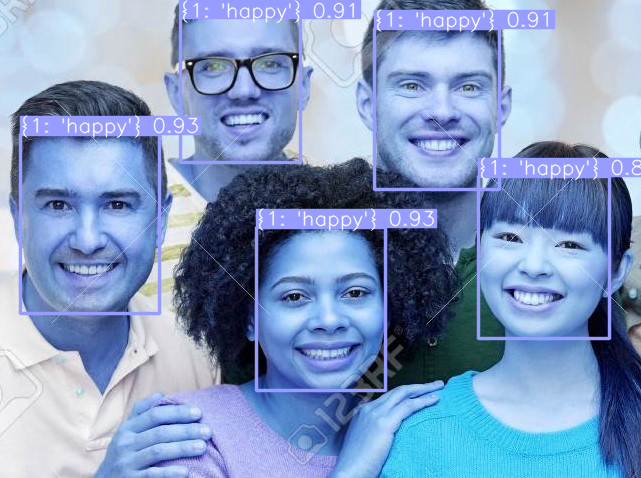

In [ ]:
res_plotted

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!yolo val model='/content/runs/detect/train/weights/best.pt' data='/content/data.yaml' split=test

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolo_output/test/labels... 1505 images, 124 backgrounds, 1 corrupt: 100% 1505/1505 [00:32<00:00, 46.29it/s] 
val: WARNING ⚠️ /content/drive/MyDrive/yolo_output/test/images/8bj909c3084349a3804abb06e89e69b3305a51b298beb50639d51dd020389jqpq.jpg: ignoring corrupt image/label: negative label values [   -0.15469   -0.079167]
val: New cache created: /content/drive/MyDrive/yolo_output/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 94/94 [00:13<00:00,  6.91it/s]
                   all       1504       1380      0.757       0.85      0.821      0.704
          {0: 'anger'}        280        280        0.8      0.744       0.85      0.715
          {1: 'happy'}        298        298      0.896       0.96      0.961      0.846
   